| |<font size="5">Classification  _  تصنيف البيانات </font>|
|-:|-:|
|<img src="https://www.tibco.com/blog/wp-content/uploads/2013/04/telco-churn.jpg" width=250></img>||
||<font size="4"> تحميل البيانات  </font>|
||<font size="4">  تحديد تسلسل معالجة البيانات</font>|
||<font size="4">XGBClassifier & PCA  تدريب البيانات وتقليص خصائصها </font>|
||<font size="4"> تقويم أداء الخوارزميات </font>|

https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_applying_machine_learning/xgboost_customer_churn/xgboost_customer_churn.ipynb

In [1]:
pwd

'/content'

In [2]:
cd  drive/My\ Drive/ML-Course

/content/drive/My Drive/ML-Course


In [3]:
ls -la  ./data/ch*

-rw------- 1 root root 298774 Sep 21  2020 ./data/churn_1.csv
-rw------- 1 root root 437903 Jun 11  2017 ./data/churn.txt


In [4]:
import numpy as np
import pandas as pd


In [9]:

#      تحميل البيانات

df = pd.read_csv('./data/churn_1.csv', index_col=0)


In [10]:
df.sample(3)

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2967,SC,149,415,no,yes,20,147.8,132,25.13,276.8,94,23.53,149.9,110,6.75,10.2,6,2.75,0,False.
2743,DE,90,415,no,no,0,198.5,124,33.75,266.6,100,22.66,243.3,80,10.95,8.0,7,2.16,2,False.
468,AZ,86,415,no,yes,32,70.9,163,12.05,166.7,121,14.17,244.9,105,11.02,11.1,5,3.00,3,False.


In [11]:
df.shape

(3333, 20)

In [12]:
df.keys()

Index(['State', 'Account Length', 'Area Code', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Int'l Plan      3333 non-null   object 
 4   VMail Plan      3333 non-null   object 
 5   VMail Message   3333 non-null   int64  
 6   Day Mins        3333 non-null   float64
 7   Day Calls       3333 non-null   int64  
 8   Day Charge      3333 non-null   float64
 9   Eve Mins        3333 non-null   float64
 10  Eve Calls       3333 non-null   int64  
 11  Eve Charge      3333 non-null   float64
 12  Night Mins      3333 non-null   float64
 13  Night Calls     3333 non-null   int64  
 14  Night Charge    3333 non-null   float64
 15  Intl Mins       3333 non-null   float64
 16  Intl Calls      3333 non-null   int64  
 17  Intl Charge     3333 non-null   f

In [14]:
#The CSV format does not store any information about data type
for col in df.select_dtypes("object").columns:
  #print(col)
  df[col]=df[col].astype("category")

In [ ]:
df.dtypes

State             category
Account Length       int64
Area Code            int64
Int'l Plan        category
VMail Plan        category
VMail Message        int64
Day Mins           float64
Day Calls            int64
Day Charge         float64
Eve Mins           float64
Eve Calls            int64
Eve Charge         float64
Night Mins         float64
Night Calls          int64
Night Charge       float64
Intl Mins          float64
Intl Calls           int64
Intl Charge        float64
CustServ Calls       int64
Churn?            category
dtype: object

In [15]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

Account Length


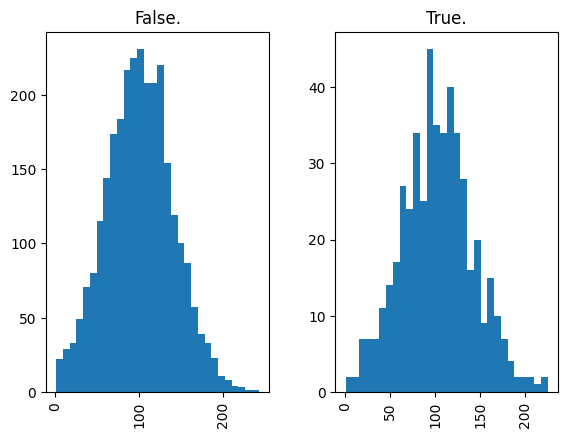

Area Code


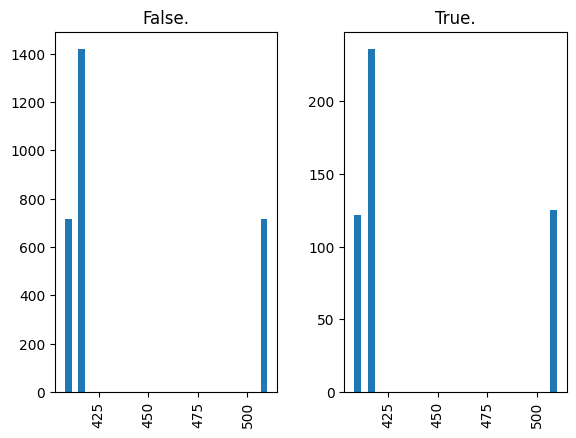

VMail Message


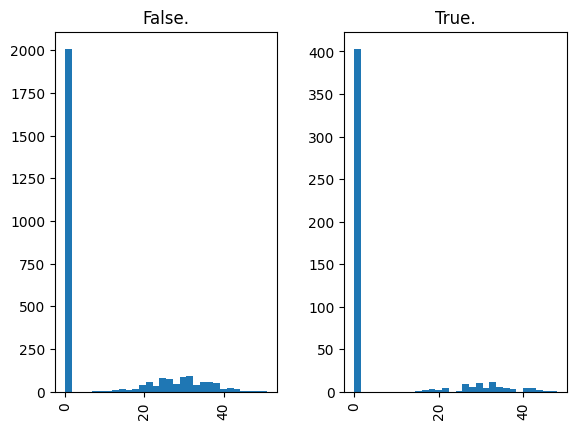

Day Mins


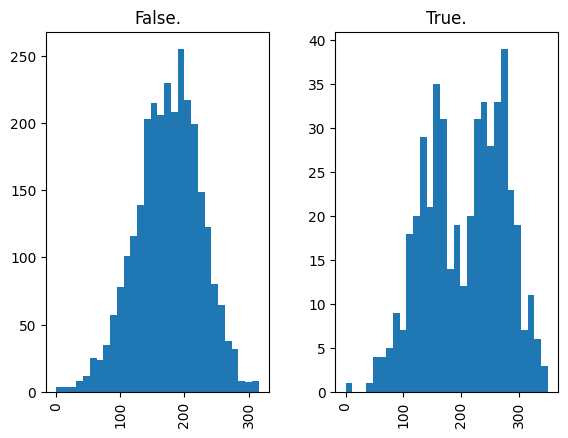

Day Calls


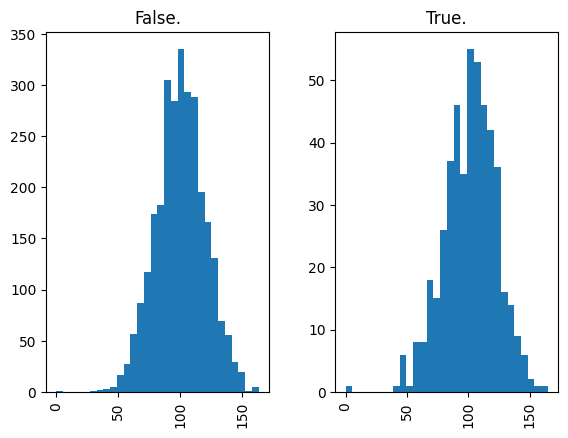

Day Charge


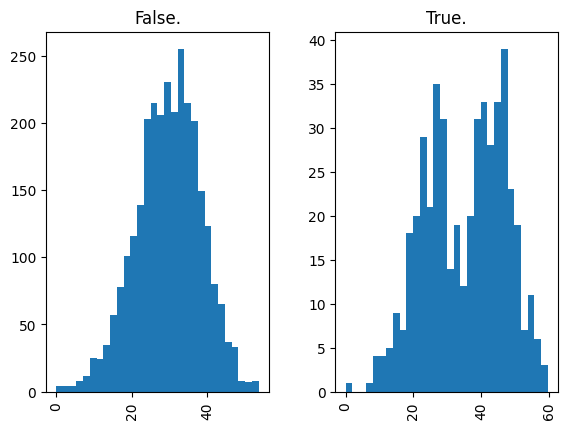

Eve Mins


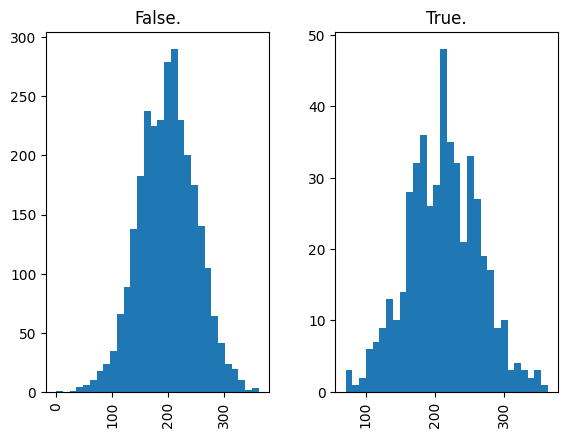

Eve Calls


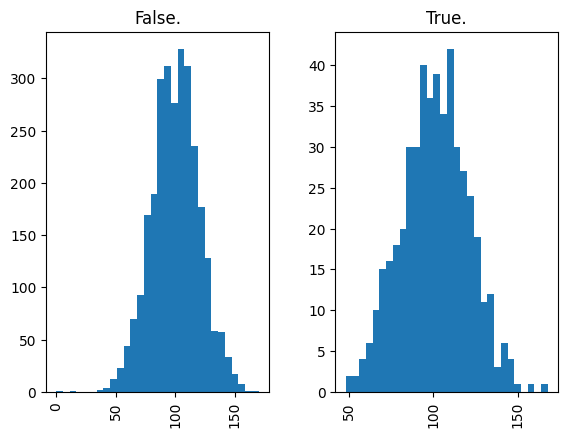

Eve Charge


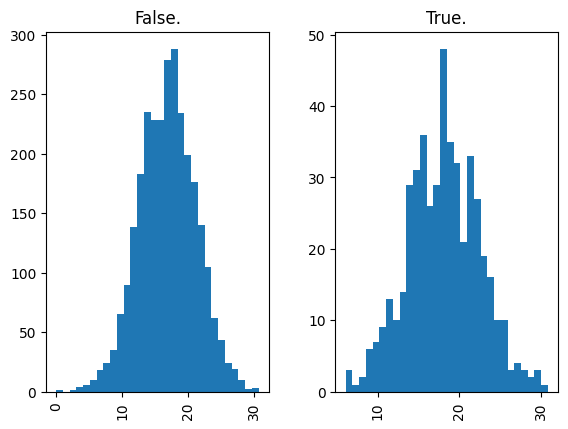

Night Mins


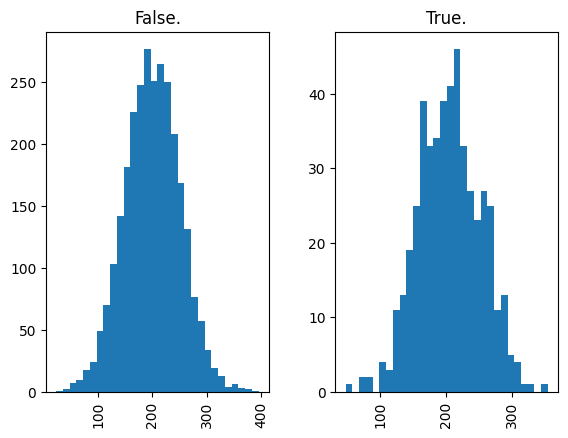

Night Calls


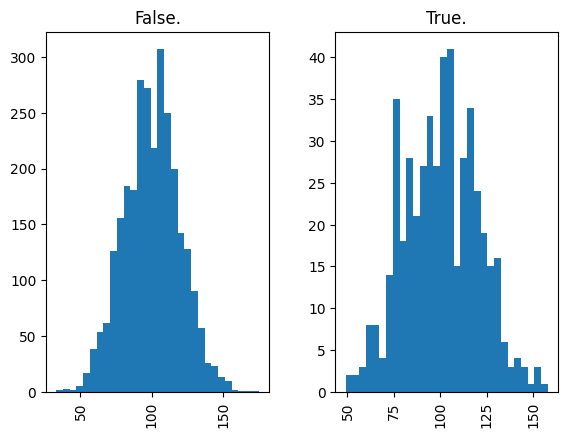

Night Charge


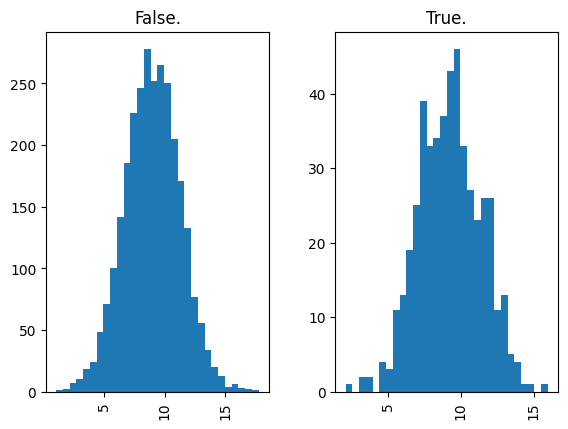

Intl Mins


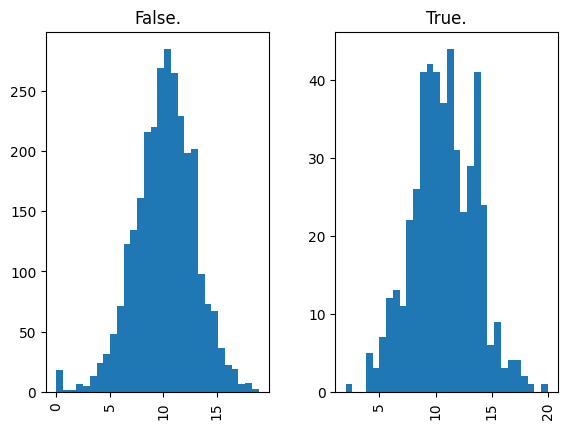

Intl Calls


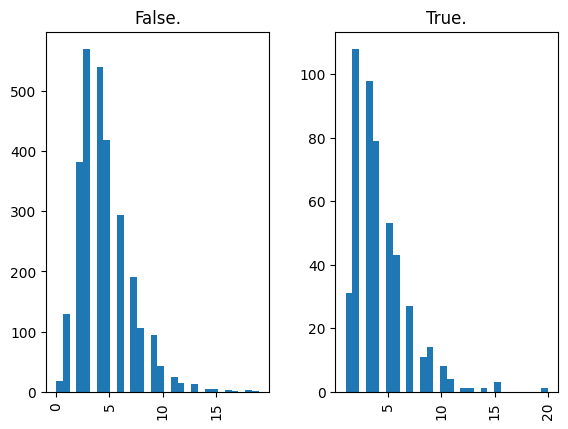

Intl Charge


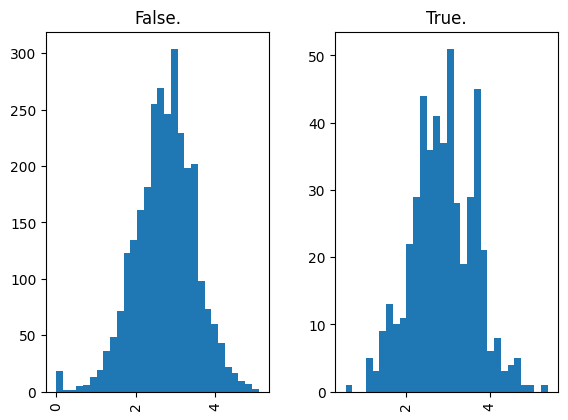

CustServ Calls


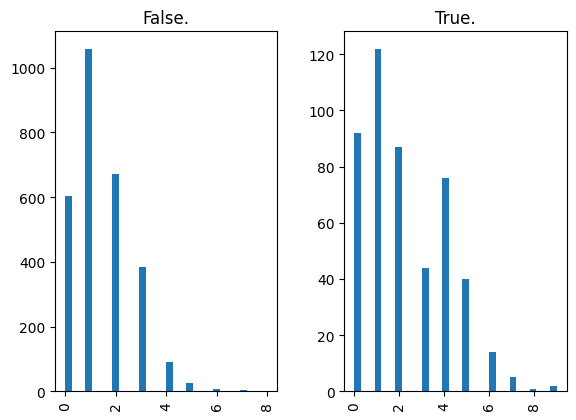

In [16]:
import matplotlib.pyplot as plt

for col in df.select_dtypes('number').columns:
    print(col)
    hist = df[[col, 'Churn?']].hist(by='Churn?', bins=30)
    plt.show()

<ipython-input-17-e6df36401c4b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cor=df.corr()


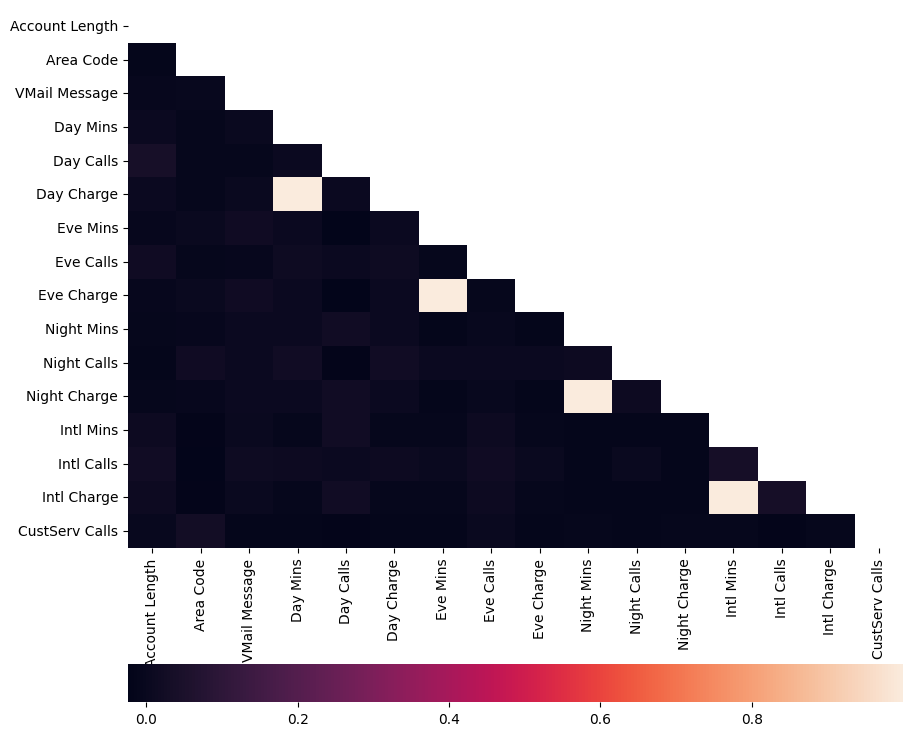

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
df_cor=df.corr()

matrix=np.triu(df_cor)
_=sns.heatmap(df_cor, mask=matrix,  cbar_kws={"orientation": "horizontal"})

In [18]:
df.corr().T


<ipython-input-18-50be2e233ef7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().T


,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
Area Code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
VMail Message,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Day Mins,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Day Calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Day Charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Eve Mins,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Eve Calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Eve Charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Night Mins,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


- In addition, we see that churners take on very similar distributions for features like Day Mins and Day Charge. That's not surprising as we'd expect minutes spent talking to correlate with charges. Let's dig deeper into the relationships between our features.

In [ ]:
# pd.plotting.scatter_matrix(df, figsize=(12, 12))
# plt.show()
# Faster

In [ ]:
_=sns.pairplot(df)

In [ ]:
# حذف جميع البيانات المتكررة
df.drop(['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.keys()

Index(['State', 'Account Length', 'Area Code', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls',
       'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [ ]:
df.dtypes

State             category
Account Length       int64
Area Code            int64
Int'l Plan        category
VMail Plan        category
VMail Message        int64
Day Mins           float64
Day Calls            int64
Eve Mins           float64
Eve Calls            int64
Night Mins         float64
Night Calls          int64
Intl Mins          float64
Intl Calls           int64
CustServ Calls       int64
Churn?            category
dtype: object

In [ ]:
df.select_dtypes("number").head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls
0,128,415,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,415,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,415,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,408,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,415,0,166.7,113,148.3,122,186.9,121,10.1,3,3


In [ ]:
df["Churn?"].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

In [ ]:
 # طريقة  مغايرة في ترميز  الهدف
 df["Churn?"]=np.where(df["Churn?"].str.contains("F"), 0, 1)

In [ ]:
# التحقق من التصنيفات
df["Churn?"].value_counts()

0    2850
1     483
Name: Churn?, dtype: int64

In [ ]:
# تحديد الخصائص والهدف
X=df.drop("Churn?", axis=1)
y=df["Churn?"]

In [ ]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [ ]:
!pip install -U scikit-learn

     |████████████████████████████████| 6.8MB 4.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import

from sklearn.pipeline import make_pipeline


num_pipeline= make_pipeline(
     StandardScaler()    # تغيير سلم البيانات الرقمية
)

cat_pipeline= make_pipeline(
     OneHotEncoder(drop="if_binary", sparse=False)  #   بما ان جميع القيم الناقصة قد تم تعويضا فلا فائدة من معالجتها لذا نقوم هنا باسقاط احد العمودين في حالة المتغير الثنائي

)

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية
     (cat_pipeline, selector(dtype_exclude="number")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية
     )

In [ ]:
# حجم البيانات الجديد
preprocess.fit_transform(X_train).shape

(2233, 65)

In [ ]:
# التحقق من تحويل  البيانات
preprocess.fit_transform(X_train)

array([[-0.81498972, -0.51621471, -0.588063  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76425984, -0.51621471,  1.16095039, ...,  0.        ,
         0.        ,  1.        ],
       [-0.33870811,  1.7389225 ,  2.25408377, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.86512463, -0.68238272, -0.588063  , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.71682307, -0.51621471, -0.588063  , ...,  0.        ,
         0.        ,  0.        ],
       [-1.61714823, -0.68238272,  2.545586  , ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
pipe_XGBCl= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية
    PCA( ),  #    يعوض لاحقا ضمن المعايير أدناه

    XGBClassifier()
)

In [ ]:
#pipeline  معايير
list(pipe_XGBCl.get_params().keys())

['memory',
 'steps',
 'verbose',
 'columntransformer',
 'pca',
 'xgbclassifier',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__standardscaler',
 'columntransformer__pipeline-1__standardscaler__copy',
 'columntransformer__pipeline-1__standardscaler__with_mean',
 'columntransformer__pipeline-1__standardscaler__with_std',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__steps',
 'columntransformer__pipeline-2__verbose',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__d

In [ ]:
from sklearn import set_config
set_config(display='diagram', )

In [ ]:
param_grid = {
   'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    'xgbclassifier__scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],  # to add at this end

    'pca__n_components':[40, 60, 80]  # to get rid off late with 5_randomizedseach_churn

}

In [ ]:
# Define cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score ),
    'roc_auc': make_scorer(roc_auc_score)
}

### GridSearchCV

![](https://adventuresindatascience.files.wordpress.com/2017/10/bb_rcv.png)

In [ ]:
#%%timeit
from sklearn.model_selection import  GridSearchCV
gridSearch = GridSearchCV(pipe_XGBCl, param_grid, scoring=scorers, refit='roc_auc',cv=kf,   n_jobs=-1 , return_train_score=True, verbose=3)

In [ ]:
# التدريب
gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 3868 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 4604 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 5404 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 6268 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | e

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f3679f99c88>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('on...
                         'xgbclassifier__max_depth': range(3, 5),
                         'xgbclassifier__n_estimators': [50, 100, 150, 200],
                         'xgbclassifier__scale_pos_weight': [1, 10, 25, 50, 75,
                                                             99, 100, 1000]},
             refit='roc_auc', return_train_score=True,
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score),
                      'roc_auc': make_scorer(roc_auc_score)},
             verbose=3)

In [ ]:
f"Best:  {gridSearch.best_score_} using  {gridSearch.best_params_}"


"Best:  0.750063572607811 using  {'pca__n_components': 40, 'xgbclassifier__colsample_bytree': 0.2, 'xgbclassifier__gamma': 0.0, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__scale_pos_weight': 10}"

In [ ]:
# افضل المعايير التي تم الاحتفاظ بها
gridSearch.best_params_

{'pca__n_components': 40,
 'xgbclassifier__colsample_bytree': 0.2,
 'xgbclassifier__gamma': 0.0,
 'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__n_estimators': 100,
 'xgbclassifier__scale_pos_weight': 10}

In [ ]:
#  قائمة أفضل المعاييير
gridSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f36795f70b8>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3653cfa2e8>)])),
                ('pca', PCA(n_components=40)),
                ('xgbclassifier',
                 XGBClassifier(colsample_bytree=0.2, gamma=0.0,
                               scale_pos_weight=10))])

In [ ]:
# قياس الدقة في ضوء أفضل المعايير
f" Score {gridSearch.best_estimator_.score(X_test, y_test):.3}"


' Score 0.764'

In [ ]:
#
f"Performance sur le train : {roc_auc_score(y_train, gridSearch.predict(X_train))} "

'Performance sur le train : 0.8737749825750086 '

In [ ]:
# overfitting problem
f"Performance sur le train : {roc_auc_score(y_test, gridSearch.predict(X_test)):0.3} "

'Performance sur le train : 0.755 '

- When you observe high training accuracy, but low tests accuracy, it is likely that you encounter overfitting problem.

In [ ]:
y_pred=gridSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}'

'Accuracy: 0.764'

In [ ]:
f"Performance sur le Test : {recall_score(y_test, gridSearch.predict(X_test)):0.3} "

'Performance sur le Test : 0.744 '

In [ ]:
! pip install  scikit-plot

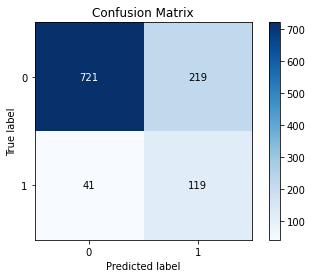

In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #, normalize=True)

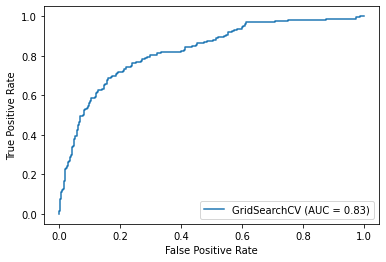

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gridSearch, X_test, y_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       940
           1       0.35      0.74      0.48       160

    accuracy                           0.76      1100
   macro avg       0.65      0.76      0.66      1100
weighted avg       0.86      0.76      0.79      1100



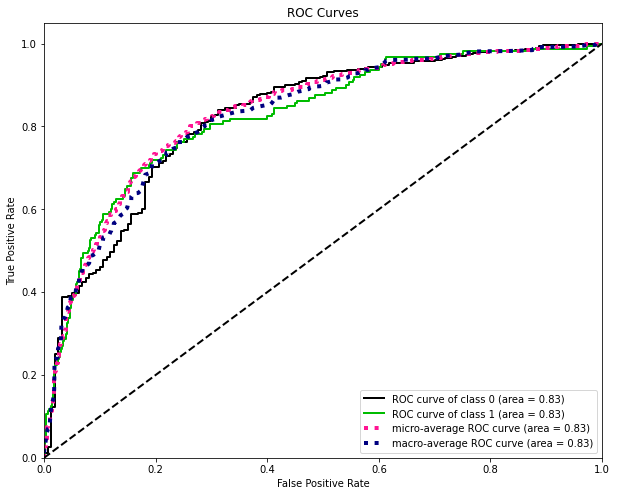

In [ ]:
y_probas = gridSearch.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


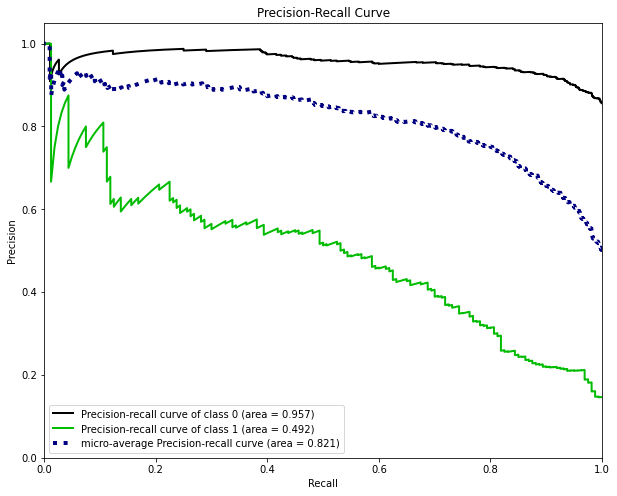

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_test, y_probas, figsize=(10, 8))
#ConfusonMattrix   وهو ما يعكسه  الجدول أعلاه بخصوص عدد المنخرطين الذين انهوا عقودهم باللون الاخضر أدناه

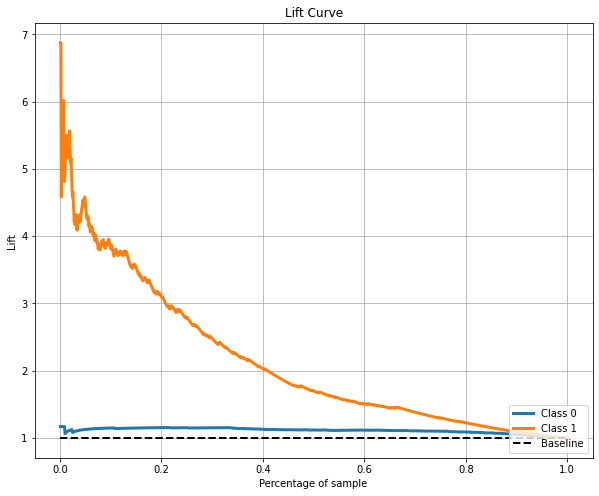

In [ ]:
# Lift is a measure of the effectiveness of a predictive model calculated as the ratio between the results obtained with and without the predictive model.
skplt.metrics.plot_lift_curve(y_test, y_probas, figsize=(10, 8))

### RandomizedSearchCV

In [ ]:
# %%timeit
from sklearn.model_selection import RandomizedSearchCV
RdSearch = RandomizedSearchCV(pipe_XGBCl, param_distributions=param_grid, cv=kf, verbose=3,
                                n_jobs=-1 ,scoring= 'accuracy'  , n_iter=1000 ) # refit="recall_score" )

In [ ]:
# التدريب
RdSearch.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 576 is smaller than n_iter=1000. Running 576 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2336 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  8.0min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f366b49c0b8>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps...
                                             ('xgbclassifier',
                                              XGBClassifier())]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'pca__n_components': [40, 60, 80],
                                        'xgbclassifier__colsample_bytree': [0.1,
                                                                            0.2],
                                        'xgbclassifier__gamma': [0.0, 0.1, 0.2],
                                        'xgbclassifier__learning_rate': [0.01,
                                                                         0.1,
                                                                         0.2,
                                                                         0.3],
                                        'xgbclassifier__max_depth': range(3, 5),
                                        'xgbclassifier__n_estimators': [50, 100,
                                                                        150,
                                                                        200]},
                   scoring='accuracy', verbose=3)

In [ ]:
# افضل المعايير التي تم الاحتفاظ بها
RdSearch.best_params_

{'pca__n_components': 40,
 'xgbclassifier__colsample_bytree': 0.2,
 'xgbclassifier__gamma': 0.1,
 'xgbclassifier__learning_rate': 0.2,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__n_estimators': 150}

In [ ]:
#  قائمة أفضل المعاييير
RdSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f366b4a6f98>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f366b4a6588>)])),
                ('pca', PCA(n_components=40)),
                ('xgbclassifier',
                 XGBClassifier(colsample_bytree=0.2, gamma=0.1,
                               learning_rate=0.2, n_estimators=150))])

In [ ]:
# قياس الدقة في ضوء أفضل المعايير
f" Score {RdSearch.best_estimator_.score(X_test, y_test):.3}"

' Score 0.875'

In [ ]:
y_pred=RdSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}'

'Accuracy: 0.875'

In [ ]:
#AUC    قياس درجة  دقة  التنبؤ لمعيار
f'Best AUC Score: {RdSearch.best_score_ :.3}'


'Best AUC Score: 0.877'

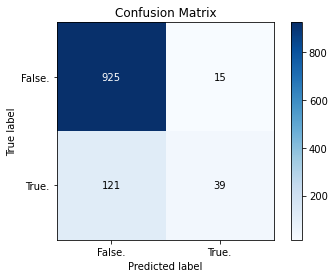

In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #, normalize=True)

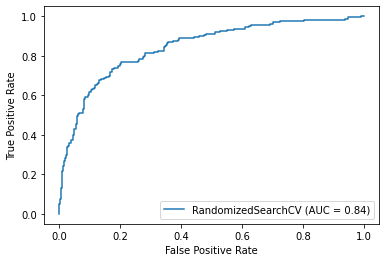

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gridSearch, X_test, y_test)

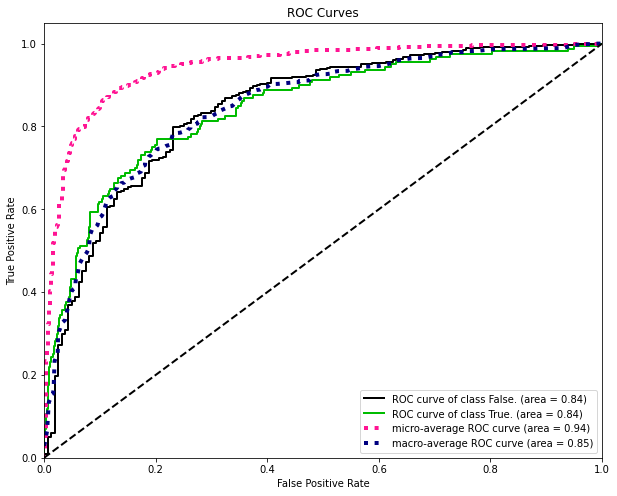

In [ ]:
#
y_probas = RdSearch.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

In [ ]:
y_probas = RdSearch.predict_proba(X_test)
y_probas[:3]

array([[0.9589995 , 0.04100047],
       [0.99620414, 0.00379584],
       [0.5277356 , 0.4722644 ]], dtype=float32)

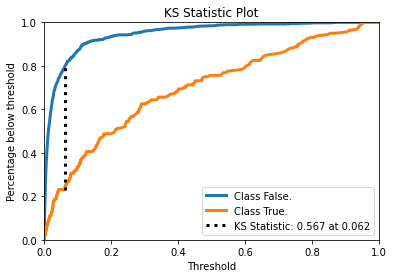

In [ ]:
# AUC تخطيط
# The K-S statistic plot, or the Kolmogorov Smirnov statistic plot, is a plot that tells you whether the model gets confused
#when it comes to predicting the different labels in your dataset

skplt.metrics.plot_ks_statistic(y_test, y_probas)

In [ ]:
print ('ROC AUC =', metrics.roc_auc_score(y_test, y_probas[:,1]))

ROC AUC = 0.8443683510638298


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      False.       0.88      0.98      0.93       940
       True.       0.72      0.24      0.36       160

    accuracy                           0.88      1100
   macro avg       0.80      0.61      0.65      1100
weighted avg       0.86      0.88      0.85      1100



In [ ]:
# عرض جدول القيم التي تم التنبؤ بها ومقارنتها بتلك التي بالجدول الأصلي
pd.DataFrame({"Predicted":y_pred, "Actual Value": y_test}).sample(6, random_state=10)

,Predicted,Actual Value
3056,False.,False.
1044,True.,False.
1795,False.,False.
1586,False.,False.
2650,False.,False.
2124,False.,False.
